# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [48]:
train = pd.read_csv('titanic_train.csv')


In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

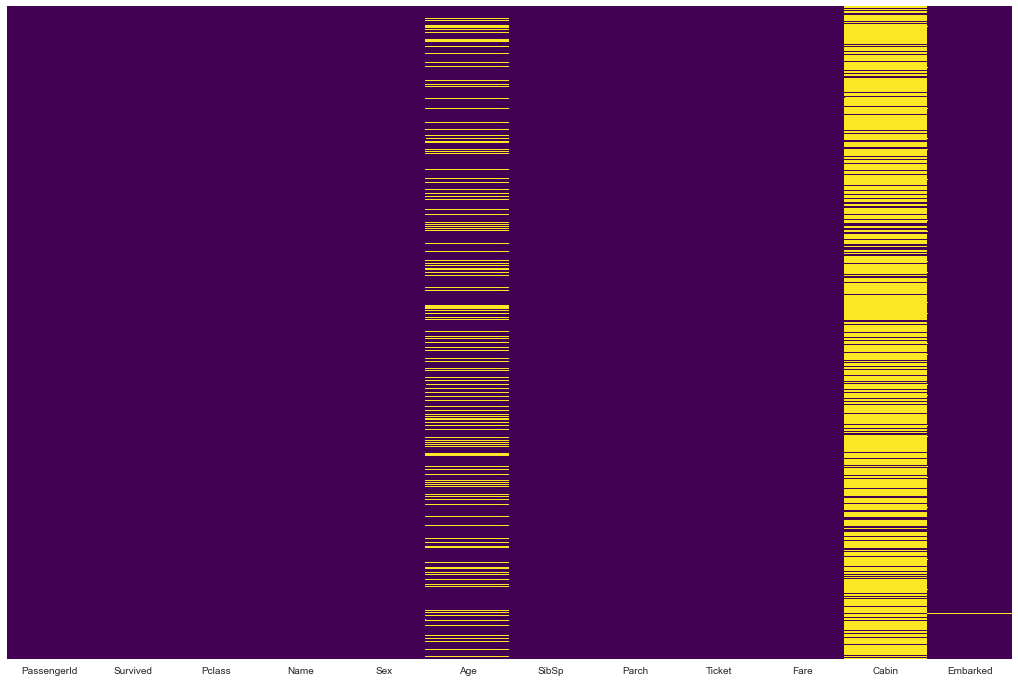

In [50]:
plt.figure(figsize=(18, 12))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [51]:
train['Embarked'].isnull().sum()

2

<AxesSubplot:xlabel='Survived', ylabel='count'>

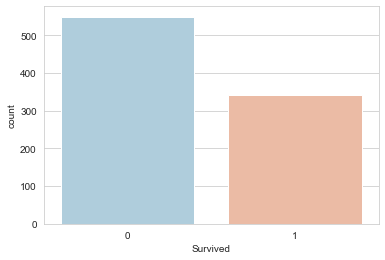

In [52]:
sns.countplot(x="Survived", data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

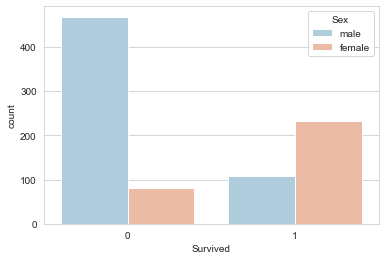

In [53]:
sns.countplot(x="Survived", data=train,hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

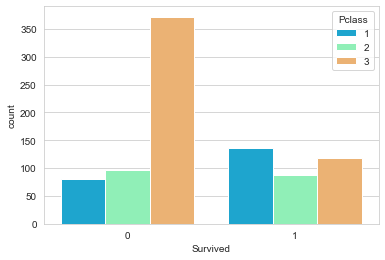

In [54]:
sns.countplot(x="Survived", data=train,hue='Pclass', palette='rainbow')

/Users/dmoussa/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

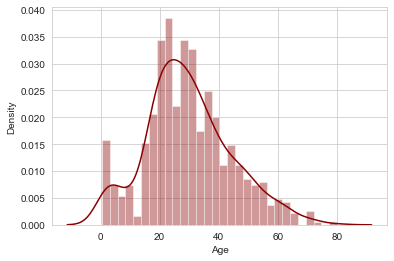

In [55]:
sns.distplot(train['Age'].dropna(),bins=30, color='darkred')

/Users/dmoussa/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

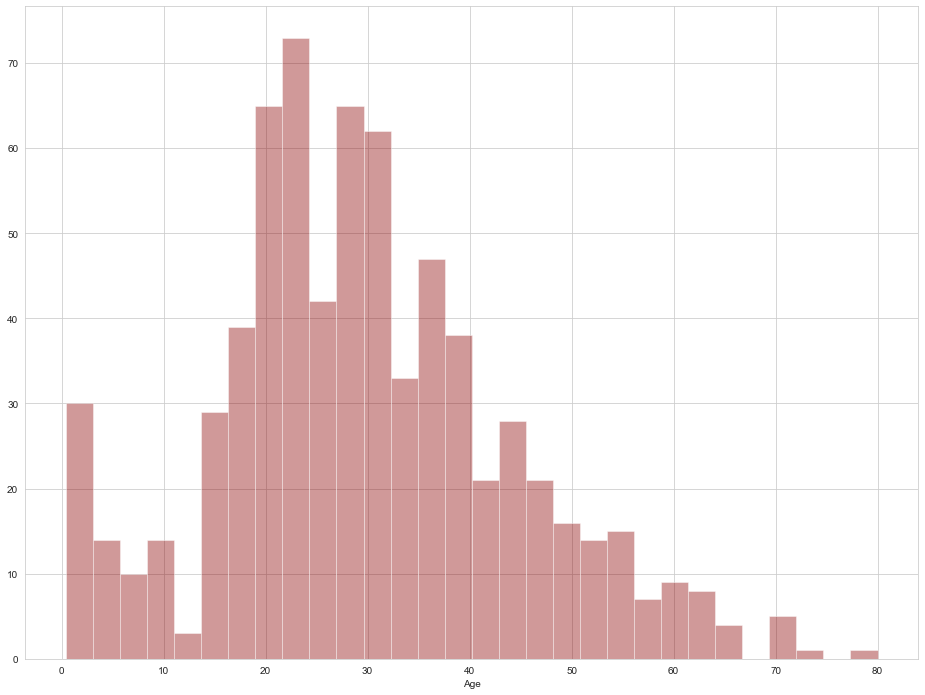

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,12))
sns.distplot(train['Age'].dropna(),bins=30, color='darkred', kde=False)

<AxesSubplot:>

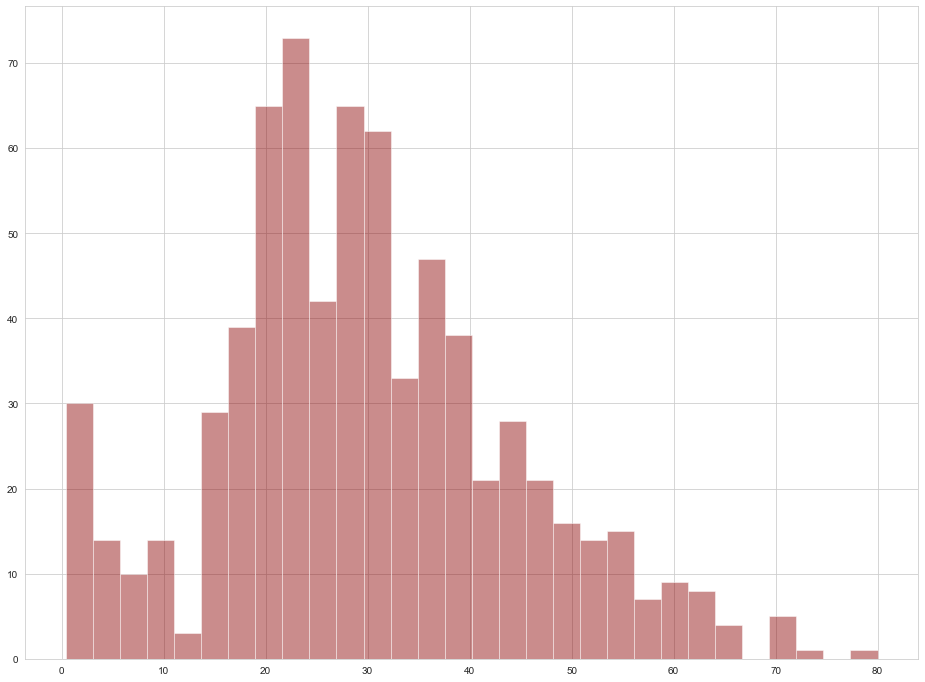

In [57]:
plt.figure(figsize=(16,12))
train['Age'].hist(bins=30, color='darkred', alpha=0.45)

<AxesSubplot:>

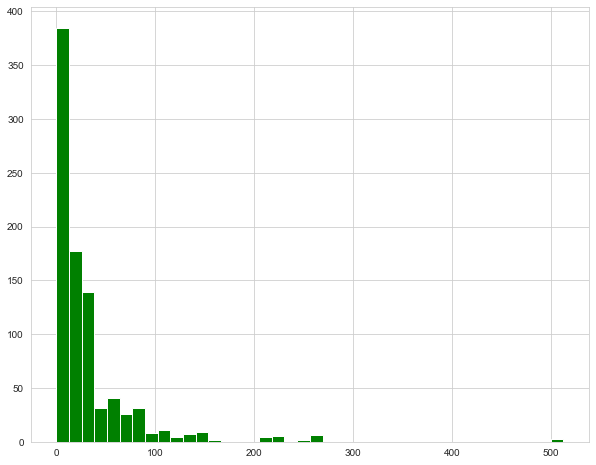

In [58]:
train['Fare'].hist(color='green', bins=40, figsize=(10,8))

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

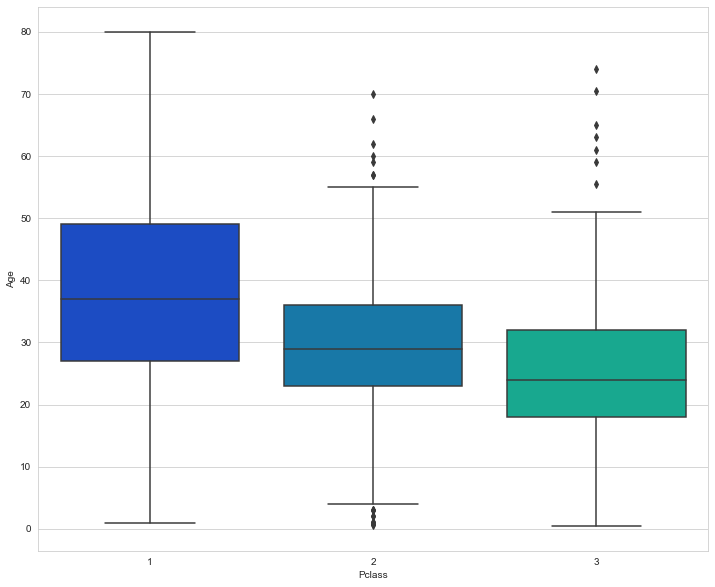

In [59]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [60]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [61]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [62]:
train.drop('Cabin', axis=1, inplace=True)

In [63]:
train.dropna(inplace=True)

<AxesSubplot:>

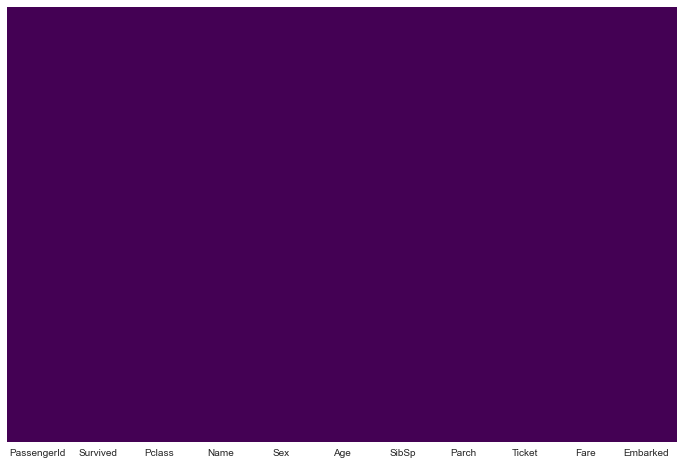

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Converting Categorical Features

In [66]:
new_feature= pd.get_dummies(train[['Sex','Embarked']],drop_first=True)
#embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Sex_male,Embarked_Q,Embarked_S,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,1


# Building a Logistic Regression Model
## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test,  y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'], test_size=0.30, random_state=101)

# Training and Prediction

In [75]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/dmoussa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
predictions  = logmodel.predict(X_test) # Graph predictions and y_test

In [82]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

